In [1]:
import pandas as pd

red_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv"
white_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv"

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7427361939580527
Test Acc :  0.7438461538461538


In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [6]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, lr.predict(X_test)))

[[275 202]
 [131 692]]


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

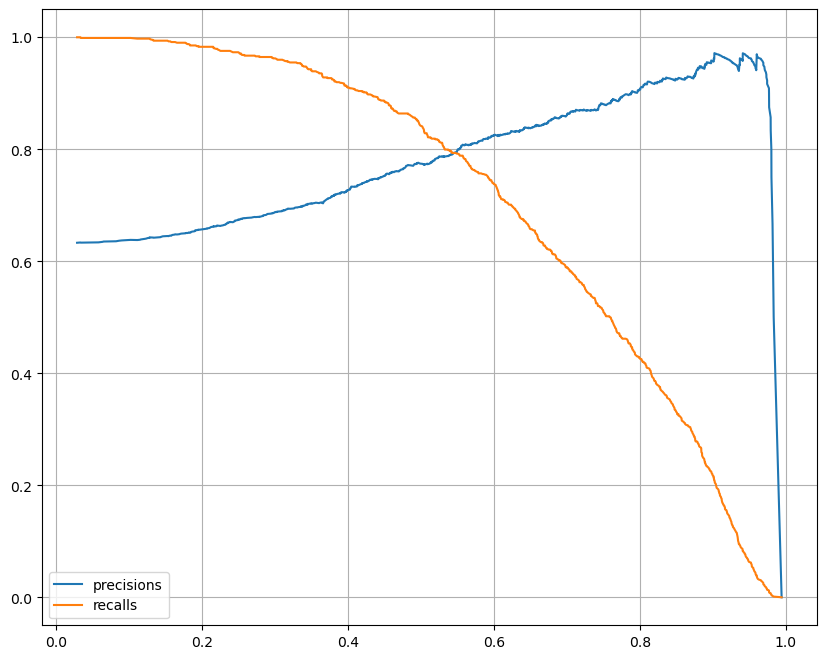

In [9]:
plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label='precisions')
plt.plot(thresholds, recalls[:len(thresholds)], label='recalls')
plt.grid()
plt.legend()
plt.show();

- recalls을 높게 가져가면 precisions가 떨어지고 precisions를 높게 가져가면 recalls가 떨어진다

- thresholds = 0.5

In [20]:

pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40526738, 0.59473262],
       [0.5095346 , 0.4904654 ],
       [0.10221428, 0.89778572]])

- 앞이 0일확률, 뒤가 1일확률인데 수치를 보면 약간 아슬아슬하긴 함

- pred_proba 뒤에 y_pred_test를 붙여넣고 싶음

In [15]:
pred_proba  # 리스트 안에 리스트가 있음

array([[0.40526738, 0.59473262],
       [0.5095346 , 0.4904654 ],
       [0.10221428, 0.89778572],
       ...,
       [0.22545761, 0.77454239],
       [0.67377926, 0.32622074],
       [0.31437975, 0.68562025]])

In [16]:
y_pred_test

array([1., 0., 1., ..., 1., 0., 1.])

In [18]:
y_pred_test.reshape(-1,1)  # 똑같이 리스트 안에 리스트로 만들어줌

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [19]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1,1)], axis=1)

array([[0.40526738, 0.59473262, 1.        ],
       [0.5095346 , 0.4904654 , 0.        ],
       [0.10221428, 0.89778572, 1.        ],
       ...,
       [0.22545761, 0.77454239, 1.        ],
       [0.67377926, 0.32622074, 0.        ],
       [0.31437975, 0.68562025, 1.        ]])

- thresholds 바꿔보기 - Binarizer

In [24]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [25]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [26]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



- recall과 precision의 결과가 약간 바뀜